# Importing

In [1]:
# Importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 200

In [2]:
# Imprting Dataset
df_sales = pd.read_csv("sales.csv")
df_sales.sample(5)

,year,month,sales
20,2022,Sep,18000
15,2022,Apr,51000
5,2021,Jun,48000
22,2022,Nov,18500
2,2021,Mar,80000


# How to Apply Custom Font

In [ ]:
import matplotlib as plt
import matplotlib.font_manager as fm
import os

fm.fontManager.addfont(f"/font/Lexend/Lexend-Bold.ttf")
fm.fontManager.addfont(f"/font/Lexend/Lexend-Regular.ttf")
fm.fontManager.addfont(f"/font/Lexend/Lexend-Light.ttf")
fm.fontManager.addfont(f"/font/Lexend/Lexend-SemiBold.ttf")

font_family = "Lexend"
plt.rcParams["font.family"] = font_family

# Standard Seaborn/Matplotlib Chart

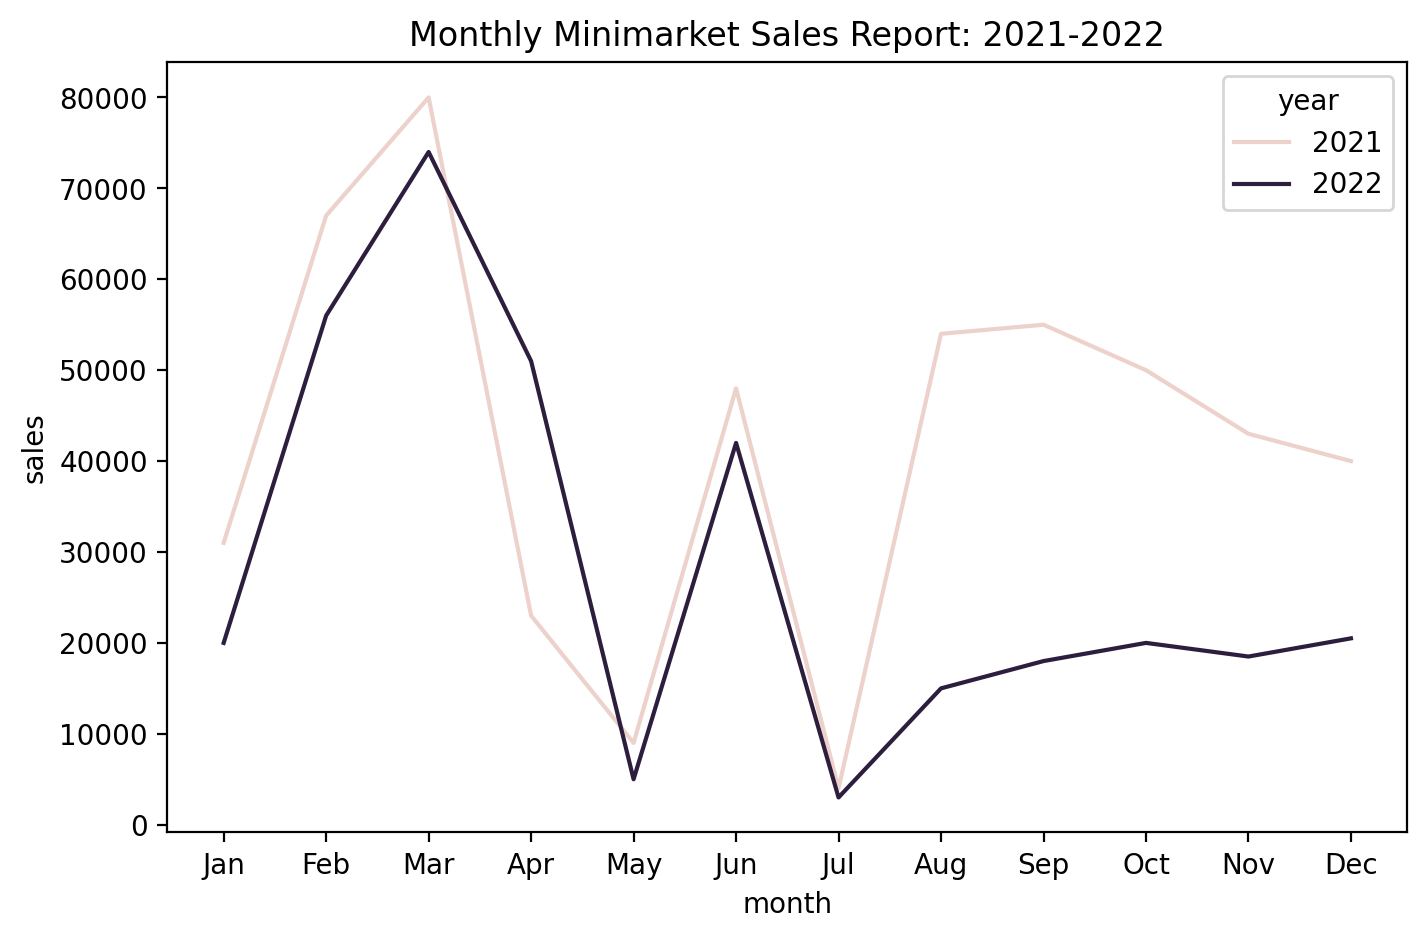

In [3]:
# Create Line Chart - v1
fig, axes = plt.subplots(figsize=(8, 5))
sns.lineplot(data=df_sales
             , x="month"
             , y="sales"
             , hue="year"
);
plt.title("Monthly Minimarket Sales Report: 2021-2022");

# Improved Version

In [4]:
#!pip install highlight-text
from highlight_text import fig_text, ax_text

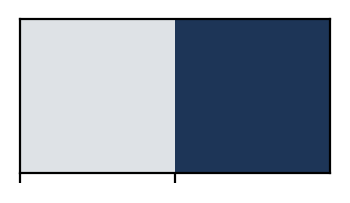

In [5]:
color_palette = ["#dee2e6", "#1d3557"]
sns.palplot(color_palette)

fig_txt_prop = dict(ha="left", va="bottom")
subtitle_prop = [
    {"color": color_palette[1], "weight": "bold"}
    , {"color": color_palette[1], "weight": "bold"}
]
annotate_prop = [
    {"color": color_palette[1], "weight": "bold"}
    , {"color": color_palette[1], "weight": "bold"}
]

legend_prop = dict(textcoords="offset points", size=9, va="center", weight="bold")

In [6]:
df_sales_sct = df_sales.loc[df_sales['month'].isin(["Aug", "Sep", "Oct", "Nov", "Dec"])]

In [7]:
df_endval = df_sales_sct.loc[df_sales['month'].isin(["Dec"])]
endval_2021 = df_endval.sales.iloc[0]
endval_2022 = df_endval.sales.iloc[1]

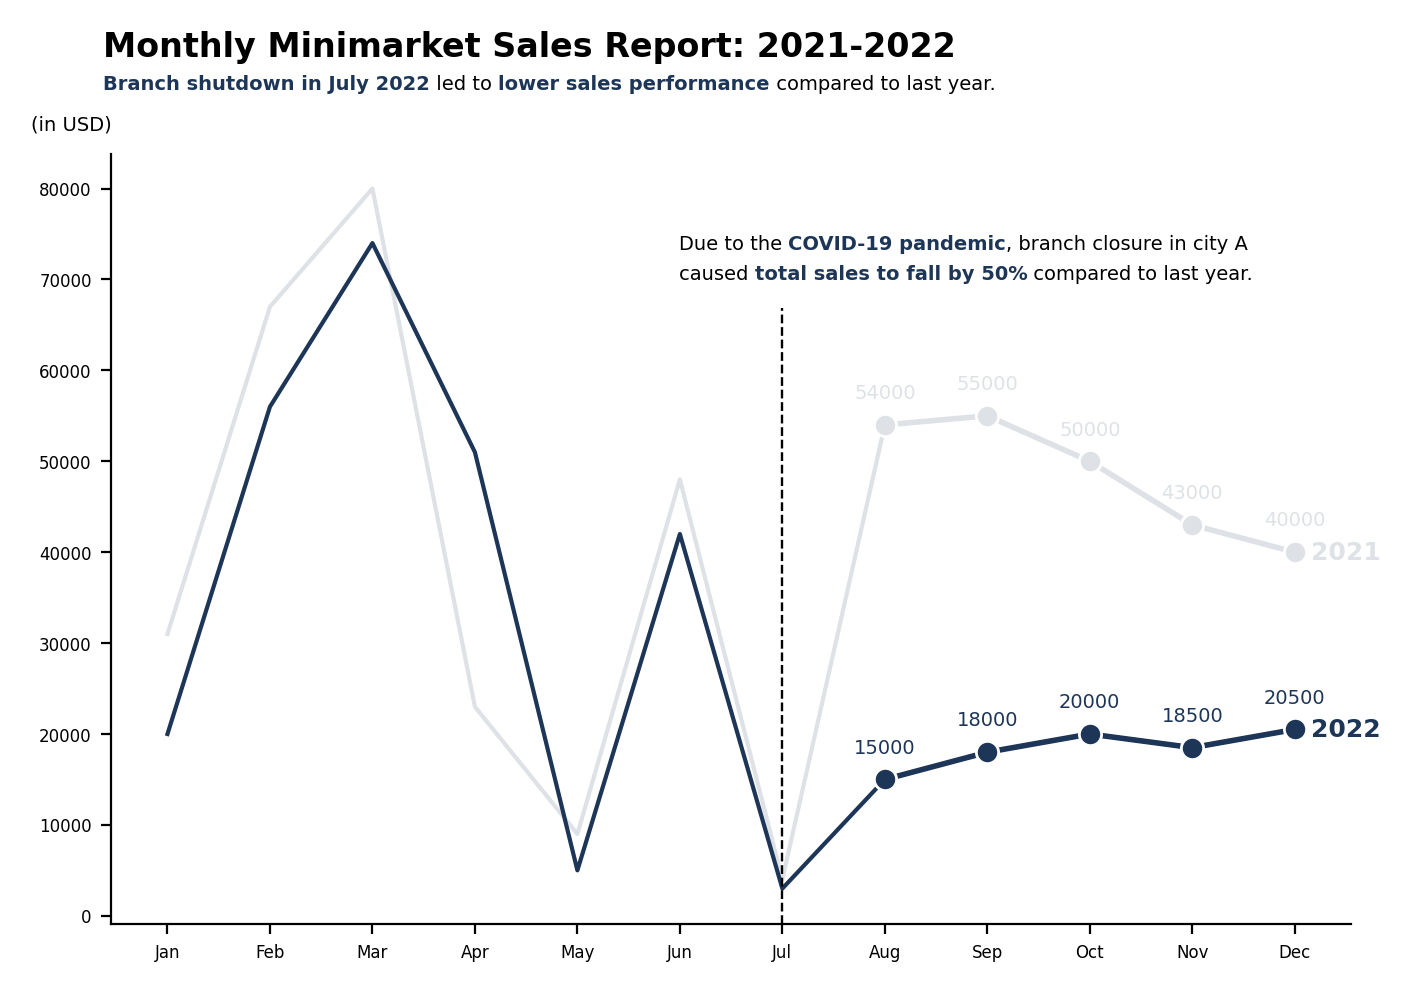

In [8]:
fig, axes = plt.subplots(figsize=(8, 5))
sns.lineplot(data=df_sales
             , x="month"
             , y="sales"
             , hue="year"
             , palette=color_palette
             , legend=False);

# --- Hiding Spines
for spine in axes.spines.values(): spine.set_color("None")
for spine in ["bottom", "left"]:
    axes.spines[spine].set_visible(True)
    axes.spines[spine].set_color("black")
    
# --- XY Labels
axes.set_ylabel("")
axes.set_xlabel("")
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)

# --- Title & Subtitle
fig_text(s="Monthly Minimarket Sales Report: 2021-2022"
         , x=0.12, y=0.97
         , fontsize=12, weight="bold", **fig_txt_prop)
fig_text(s=f"<Branch shutdown in July 2022> led to <lower sales performance> compared to last year."
         , x=0.12, y=0.94
         , fontsize=7, highlight_textprops=subtitle_prop, **fig_txt_prop);
fig_text(s=f"(in USD)"
         , x=0.075, y=0.9
         , fontsize=7, **fig_txt_prop);

# --- Adding Lines
axes.axvline("Jul"
             , linestyle="--"
             , ymax=0.8
             , color="black"
             , linewidth=0.85
             , zorder=3);

# --- Legend
for line in axes.lines:
    if line.get_ydata()[-1] == endval_2021:
        legend_2021 = axes.annotate("2021"
                                    ,  xy=(0.95, endval_2021)
                                    , xytext=(8, 0)
                                    , color=line.get_color()
                                    , xycoords=axes.get_yaxis_transform()
                                    , **legend_prop)
    if line.get_ydata()[-1] == endval_2022:
        legend_2022 = axes.annotate("2022"
                                    , xy=(0.95, endval_2022)
                                    , xytext=(8, 0)
                                    , color=line.get_color()
                                    , xycoords=axes.get_yaxis_transform()
                                    , **legend_prop)

# --- Scatter
axes.plot(df_sales_sct["month"].loc[df_sales_sct["year"] == 2021]
          , df_sales_sct["sales"].loc[df_sales_sct["year"] == 2021]
          , alpha=1, color=color_palette[0], linewidth=2, marker="o", ms=8, markeredgecolor="white");
axes.plot(df_sales_sct["month"].loc[df_sales_sct["year"] == 2022]
          , df_sales_sct["sales"].loc[df_sales_sct["year"] == 2022]
          , alpha=1, color=color_palette[1], linewidth=2, marker="o", ms=8, markeredgecolor="white");

# --- Annotate
for idx, row in df_sales_sct.iterrows():
    year, month, sales = row["year"], row["month"], row["sales"]
    if year == 2021:
        color = color_palette[0]
    elif year == 2022:
        color = color_palette[1]
    axes.annotate(sales, xy=(month, sales+3500)
                  , color=color, size=7, va="center", ha="center")
    
fig_text(s="""Due to the <COVID-19 pandemic>, branch closure in city A\ncaused <total sales to fall by 50%> compared to last year."""
         , x=0.48, y=0.75
         , fontsize=7, highlight_textprops=annotate_prop, **fig_txt_prop);